In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the Datasets
data= pd.read_csv('nyc_taxi_trip_duration.csv')
data= data.iloc[0:50000,]

In [4]:
data['trip_duration']= data['trip_duration'].apply(lambda x:x/3600)
data['store_and_fwd_flag']= 1 * (data.store_and_fwd_flag.values=='Y')

In [5]:
data.shape

(50000, 11)

In [6]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,0.235556


In [7]:
# Seperating Independent and Dependent Variables
x = data.drop(['trip_duration','id','pickup_datetime','dropoff_datetime','pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((50000, 2), (50000,))

In [8]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [11]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [12]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [23]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = np.sqrt(mse(train_predict, train_y))
print('Training Mean Squared Error', k )

Training Mean Squared Error 2.880053810318422


In [24]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test Mean Squared Error    ', k )

Test Mean Squared Error     1.0870901183795487


# Parameters of Linear Regression 

In [15]:
lr.coef_

array([ 0.01731364, -0.00018404])

# Plotting the Coefficients

Text(0.5, 1.0, 'Coefficient plot')

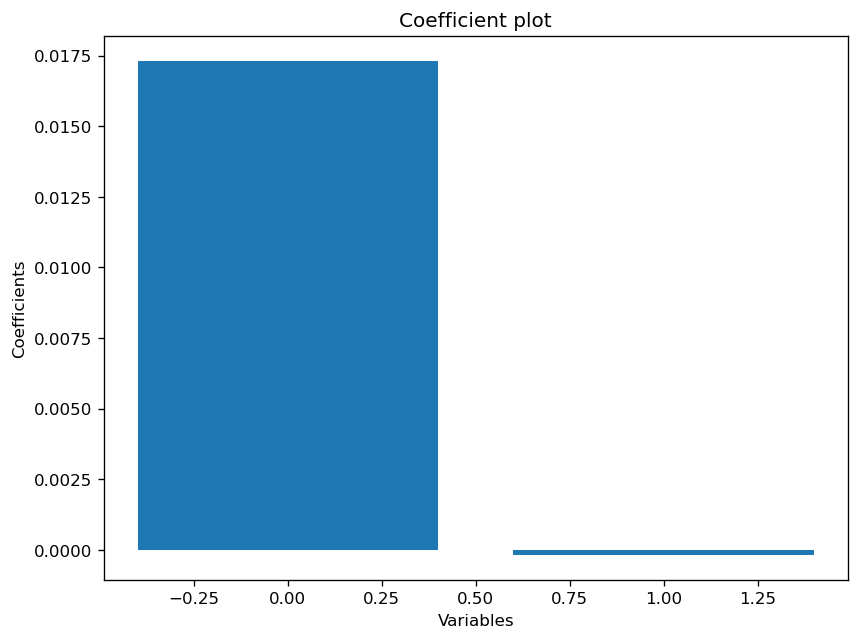

In [16]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

# Calculating the Residuals

In [17]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
43905,0.055556,0.278379,-0.222824
10991,0.331944,0.261066,0.070879
29294,0.323889,0.260882,0.063007
23457,0.705278,0.278379,0.426899
46531,0.235278,0.278379,-0.043101


# Checking Distribution of Residuals

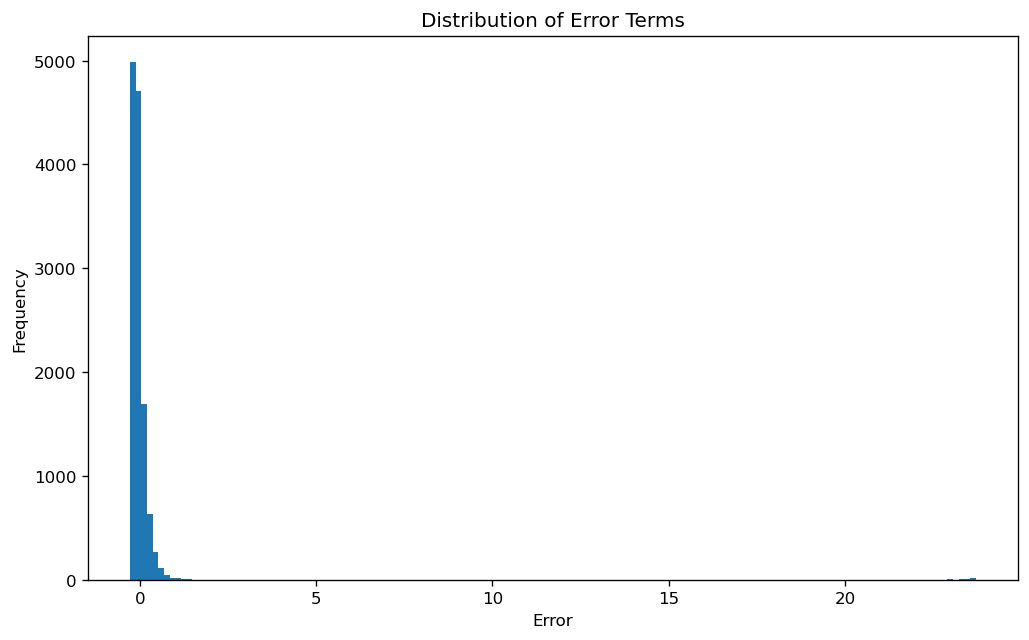

In [19]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

# Implementation of QQ-plots 

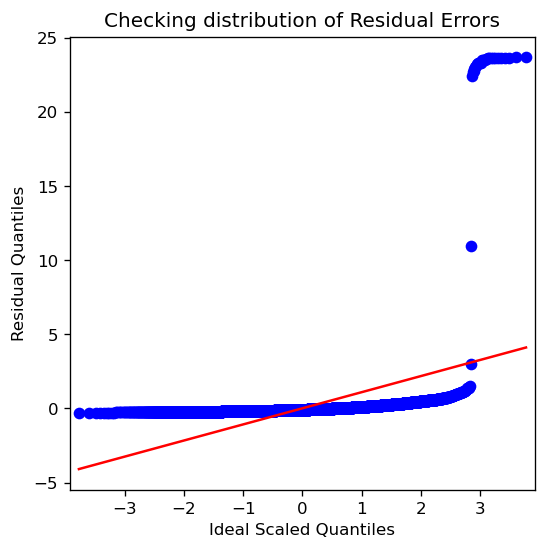

In [20]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [21]:
#calculating the train score 

linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

0.0008856699761916609

In [22]:
#calculating the test score

linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.05375875759929816

# Conclusions from the Linear model.
 1. The Training Mean Squared Error is 2.880053810318422
 2. The Test Mean Squared Error is 1.0870901183795487
 3. On plotting the qqplot we see that the residual quantile line doesn't fit over all ideal scaled quantiles.
 4. The Train score of Linear Model is 0.0008856699761916609
 5. The Test score of Linear Model is 0.05375875759929816
 6. From both the Train and Test score we can say that the scores are very Low.